In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns

In [2]:
def add_value_labels(ax, spacing=5):
    # Função adaptada do Stak Oveflow no link: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
    # Esta função adiciona os value labels acima da barra no gráfico abaixo

    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            
            
def get_rate(season):
    return SupernaturalDf.loc[(SupernaturalDf.Season==season) & (SupernaturalDf.EpisodeNumber==SeasonLength[season]), 'Rate'].values[0]

In [3]:
link = 'https://www.imdb.com/title/tt0460681/episodes?season='
season_n = [str(idx) for idx in range(1, 16)]
season_n

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15']

In [4]:
url = [link + idx for idx in season_n]
url

['https://www.imdb.com/title/tt0460681/episodes?season=1',
 'https://www.imdb.com/title/tt0460681/episodes?season=2',
 'https://www.imdb.com/title/tt0460681/episodes?season=3',
 'https://www.imdb.com/title/tt0460681/episodes?season=4',
 'https://www.imdb.com/title/tt0460681/episodes?season=5',
 'https://www.imdb.com/title/tt0460681/episodes?season=6',
 'https://www.imdb.com/title/tt0460681/episodes?season=7',
 'https://www.imdb.com/title/tt0460681/episodes?season=8',
 'https://www.imdb.com/title/tt0460681/episodes?season=9',
 'https://www.imdb.com/title/tt0460681/episodes?season=10',
 'https://www.imdb.com/title/tt0460681/episodes?season=11',
 'https://www.imdb.com/title/tt0460681/episodes?season=12',
 'https://www.imdb.com/title/tt0460681/episodes?season=13',
 'https://www.imdb.com/title/tt0460681/episodes?season=14',
 'https://www.imdb.com/title/tt0460681/episodes?season=15']

# Copy

In [5]:
SeasonLength = {1: 22, 2: 22, 3: 16, 4: 22, 5: 22, 6: 22, 7: 23,
                8: 23, 9: 23, 10: 23, 11: 23, 12: 23, 13: 23,
                14: 20, 15: 20}

In [6]:
%%time
season_dict = {}
get_off = ['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', 'Rate', 'Error: please try again.']

for sea, page in enumerate(url):
    search = requests.get(page)
    soup = BeautifulSoup(search.content, 'html.parser')
    results = soup.find(id='episodes_content')
    releases = results.find_all('div', class_='info')
    cleaned_releases = []
    
    for idx, release in enumerate(releases):
        release_text = release.text.strip().split('\n')
        for element in release_text:
            cleaned_element = ' '.join(element.strip().split())
            if cleaned_element not in get_off:
                cleaned_releases.append(cleaned_element)
                
    season = np.array_split(cleaned_releases, SeasonLength[sea + 1])          
    season_dict[sea + 1] = season

Wall time: 27.1 s


In [7]:
season_dict

{1: [array(['8 Nov. 2005', 'Pilot', '8.5', '(10,088)',
         'Sam and Dean Winchester were trained by their father to hunt the creatures of the supernatural. Now, their father has mysteriously disappeared while hunting the demon that killed their mother, 22 years ago.'],
        dtype='<U557'),
  array(['20 Sep. 2005', 'Wendigo', '7.9', '(8,026)',
         'Sam and Dean make a stop at Blackwater Ridge and end up helping a young woman and her brother find their other brother, who mysteriously disappeared, while on a camping trip, in the woods.'],
        dtype='<U557'),
  array(['27 Sep. 2005', 'Dead in the Water', '7.9', '(7,422)',
         'Something in the lake of a small town is killing innocent people.'],
        dtype='<U557'),
  array(['4 Oct. 2005', 'Phantom Traveler', '8.0', '(7,056)',
         "A friend of John's calls Sam and Dean for help about a strange recording on the black box of a crashed plane. They soon realize that the demon which caused the crash is picking off t

In [8]:
dataframes = {}
for key in season_dict.keys():
    df = pd.DataFrame(season_dict[key], columns=['ReleaseDate', 'EpisodeName', 'Rate', 'Votes', 'EpisodeDescription'])
    df['EpisodeNumber'] = np.arange(1, SeasonLength[key] + 1)
    df['Season'] = key
    dataframes[key] = df

In [9]:
# Concatenate the dataframes into a single dataframe
concatenated_df = pd.concat(dataframes.values(), ignore_index=True)

# Reset the index of the concatenated dataframe
concatenated_df.reset_index(drop=True, inplace=True)

# Print the concatenated dataframe
concatenated_df

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
0,8 Nov. 2005,Pilot,8.5,"(10,088)",Sam and Dean Winchester were trained by their ...,1,1
1,20 Sep. 2005,Wendigo,7.9,"(8,026)",Sam and Dean make a stop at Blackwater Ridge a...,2,1
2,27 Sep. 2005,Dead in the Water,7.9,"(7,422)",Something in the lake of a small town is killi...,3,1
3,4 Oct. 2005,Phantom Traveler,8.0,"(7,056)",A friend of John's calls Sam and Dean for help...,4,1
4,11 Oct. 2005,Bloody Mary,8.3,"(7,193)",A game of Bloody Mary unleashes a ghost who li...,5,1
...,...,...,...,...,...,...,...
322,22 Oct. 2020,Drag Me Away (From You),7.2,"(2,452)",Sam and Dean are asked to investigate the murd...,16,15
323,29 Oct. 2020,Unity,8.2,"(4,296)",Dean hits the road with Jack who needs to comp...,17,15
324,5 Nov. 2020,Despair,8.4,"(7,882)","With the plan in full motion, Sam, Dean, Casti...",18,15
325,12 Nov. 2020,Inherit the Earth,8.4,"(7,680)",Everything is on the line as the battle agains...,19,15


In [10]:
SupernaturalDf = concatenated_df.sort_values(by=['Season', 'EpisodeNumber'])

In [11]:
SupernaturalDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 326
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ReleaseDate         327 non-null    object
 1   EpisodeName         327 non-null    object
 2   Rate                327 non-null    object
 3   Votes               327 non-null    object
 4   EpisodeDescription  327 non-null    object
 5   EpisodeNumber       327 non-null    int32 
 6   Season              327 non-null    int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 19.2+ KB


In [12]:
SupernaturalDf['Rate'] = SupernaturalDf['Rate'].apply(lambda x: float(x))
SupernaturalDf['Votes'] = SupernaturalDf['Votes'].apply(lambda x: int(x[1:-1].replace(',', '')))

In [13]:
SupernaturalDf

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
0,8 Nov. 2005,Pilot,8.5,10088,Sam and Dean Winchester were trained by their ...,1,1
1,20 Sep. 2005,Wendigo,7.9,8026,Sam and Dean make a stop at Blackwater Ridge a...,2,1
2,27 Sep. 2005,Dead in the Water,7.9,7422,Something in the lake of a small town is killi...,3,1
3,4 Oct. 2005,Phantom Traveler,8.0,7056,A friend of John's calls Sam and Dean for help...,4,1
4,11 Oct. 2005,Bloody Mary,8.3,7193,A game of Bloody Mary unleashes a ghost who li...,5,1
...,...,...,...,...,...,...,...
322,22 Oct. 2020,Drag Me Away (From You),7.2,2452,Sam and Dean are asked to investigate the murd...,16,15
323,29 Oct. 2020,Unity,8.2,4296,Dean hits the road with Jack who needs to comp...,17,15
324,5 Nov. 2020,Despair,8.4,7882,"With the plan in full motion, Sam, Dean, Casti...",18,15
325,12 Nov. 2020,Inherit the Earth,8.4,7680,Everything is on the line as the battle agains...,19,15


In [14]:
SupernaturalDf.sort_values(by=['Rate', 'Votes'], ascending=False)[0:10]

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
103,13 May 2010,Swan Song,9.7,10946,"With the Apocalypse looming, Sam and Dean real...",22,5
118,25 Feb. 2011,The French Mistake,9.6,10472,To protect Sam and Dean from a surprise attack...,15,6
89,5 Nov. 2009,Changing Channels,9.6,10335,Dean and Sam are thrown into an alternate univ...,8,5
279,29 Mar. 2018,ScoobyNatural,9.6,8293,"Sam, Dean, and Castiel are transported into th...",16,13
54,14 Feb. 2008,Mystery Spot,9.5,8686,"Sam relives the same day over and over, contin...",11,3
199,11 Nov. 2014,Fan Fiction,9.4,8781,Sam and Dean investigate a haunting at a theatre.,5,10
60,18 Sep. 2008,Lazarus Rising,9.4,8313,Sam tries to move on without his brother and b...,1,4
43,17 May 2007,All Hell Breaks Loose: Part 2,9.4,7222,Dean hits an emotional rock bottom after a dev...,22,2
221,28 Oct. 2015,Baby,9.4,6944,Sam and Dean's road trip to fight monsters and...,4,11
237,4 May 2016,Don't Call Me Shurley,9.4,6290,Amara unleashes a dark fog on a small town tha...,20,11


In [15]:
SupernaturalDf.sort_values(by='Votes', ascending=False)[0:10]

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
326,19 Nov. 2020,Carry On,6.9,22876,It's the final ride for saving people and hunt...,20,15
103,13 May 2010,Swan Song,9.7,10946,"With the Apocalypse looming, Sam and Dean real...",22,5
118,25 Feb. 2011,The French Mistake,9.6,10472,To protect Sam and Dean from a surprise attack...,15,6
89,5 Nov. 2009,Changing Channels,9.6,10335,Dean and Sam are thrown into an alternate univ...,8,5
0,8 Nov. 2005,Pilot,8.5,10088,Sam and Dean Winchester were trained by their ...,1,1
199,11 Nov. 2014,Fan Fiction,9.4,8781,Sam and Dean investigate a haunting at a theatre.,5,10
54,14 Feb. 2008,Mystery Spot,9.5,8686,"Sam relives the same day over and over, contin...",11,3
60,18 Sep. 2008,Lazarus Rising,9.4,8313,Sam tries to move on without his brother and b...,1,4
279,29 Mar. 2018,ScoobyNatural,9.6,8293,"Sam, Dean, and Castiel are transported into th...",16,13
1,20 Sep. 2005,Wendigo,7.9,8026,Sam and Dean make a stop at Blackwater Ridge a...,2,1


In [16]:
SupernaturalDf.sort_values(by='Rate', ascending=False)[0:10]['EpisodeDescription'].values

array(['With the Apocalypse looming, Sam and Dean realize they are out of options and make heart-breaking decisions that will change their lives forever.',
       'To protect Sam and Dean from a surprise attack from Raphael, Balthazar sends them both into an alternate universe where their lives are a TV show called Sobrenatural (2005).',
       'Sam, Dean, and Castiel are transported into the animated world of Scooby Doo where they join forces with the Scooby gang to solve a ghostly mystery.',
       'Dean and Sam are thrown into an alternate universe by the Trickster where they are characters in different TV series.',
       "Sam relives the same day over and over, continually having to deal with Dean's death.",
       'Sam and Dean investigate a haunting at a theatre.',
       'Dean hits an emotional rock bottom after a devastating personal loss. The Yellow Eyed Demon begins a calculated strategic move to unleash the armies of hell.',
       "Sam and Dean's road trip to fight monster

In [17]:
aggs_by_cols = {'Rate': [np.min, np.max, np.ptp, np.mean, np.median],
                'Votes': [np.min, np.max, np.sum, np.mean, np.median]}

SupernaturalGroupby = SupernaturalDf.groupby('Season').agg(aggs_by_cols)

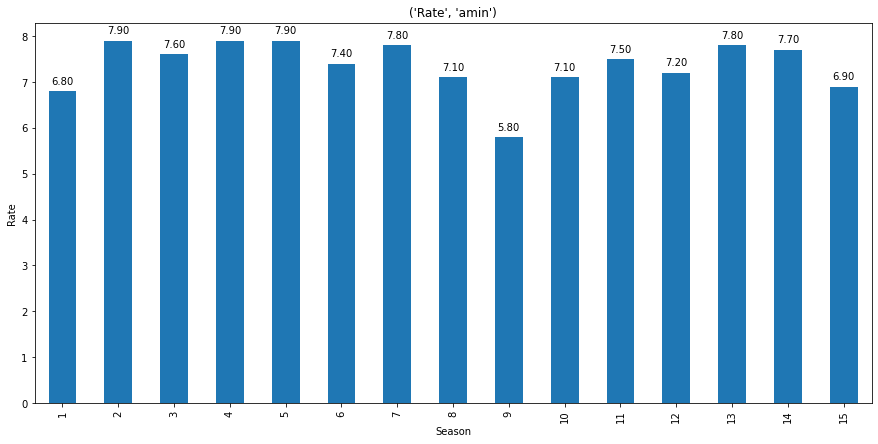

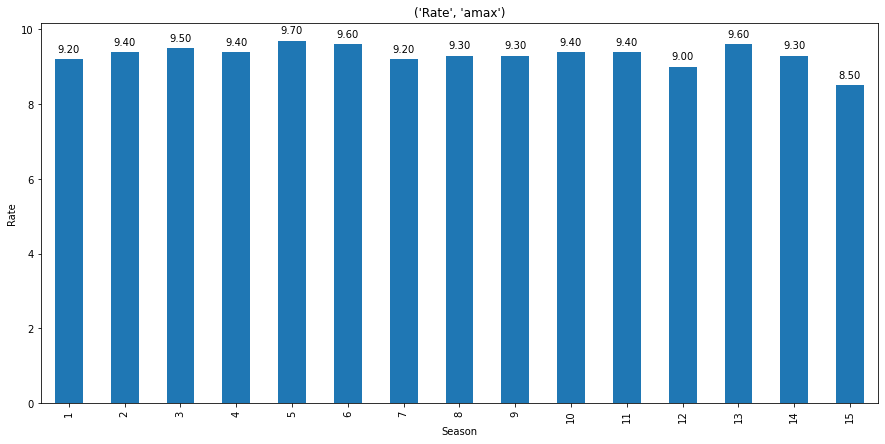

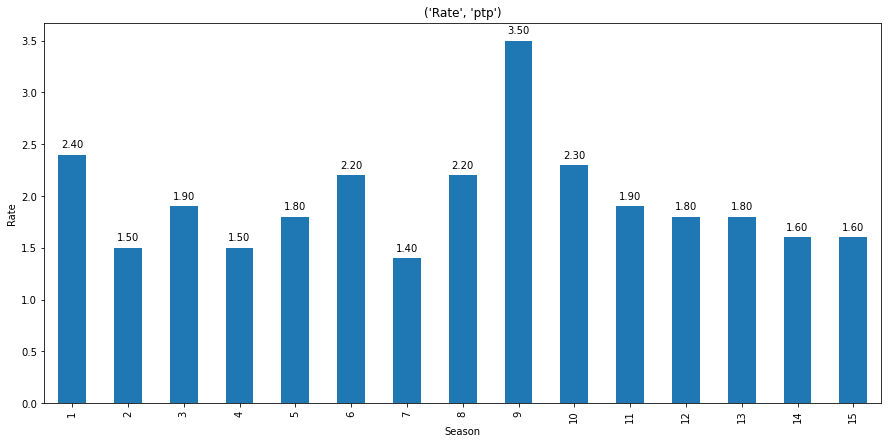

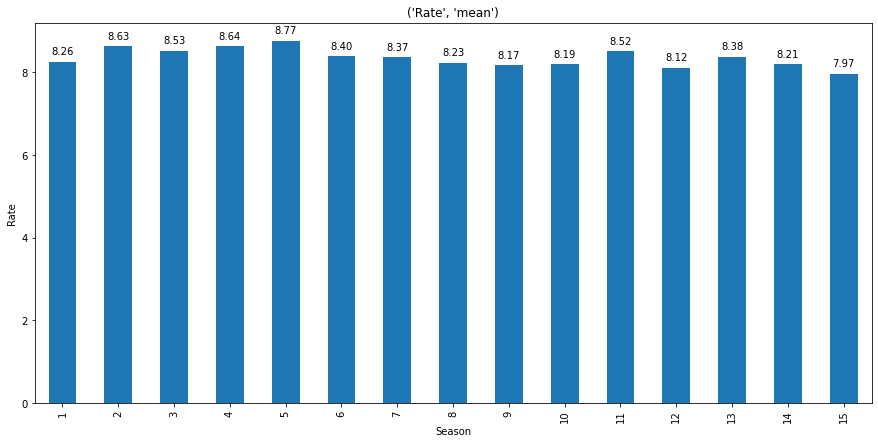

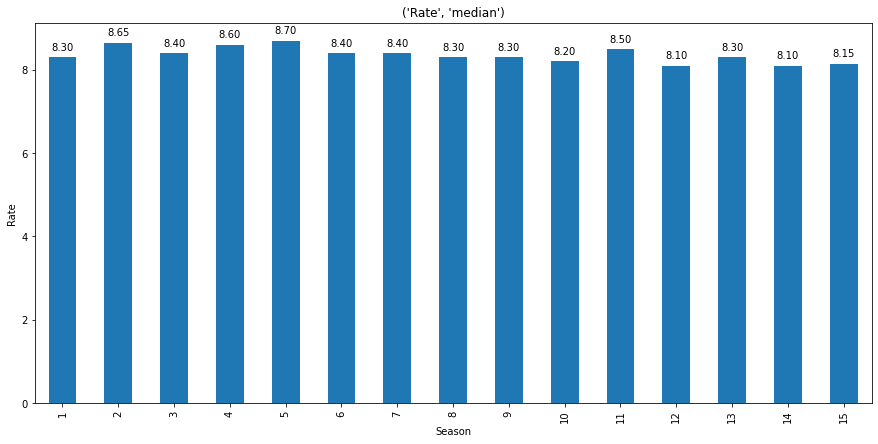

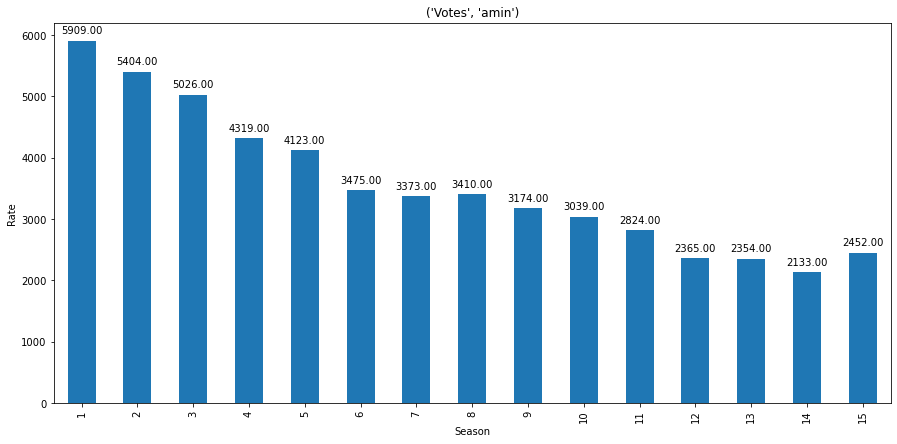

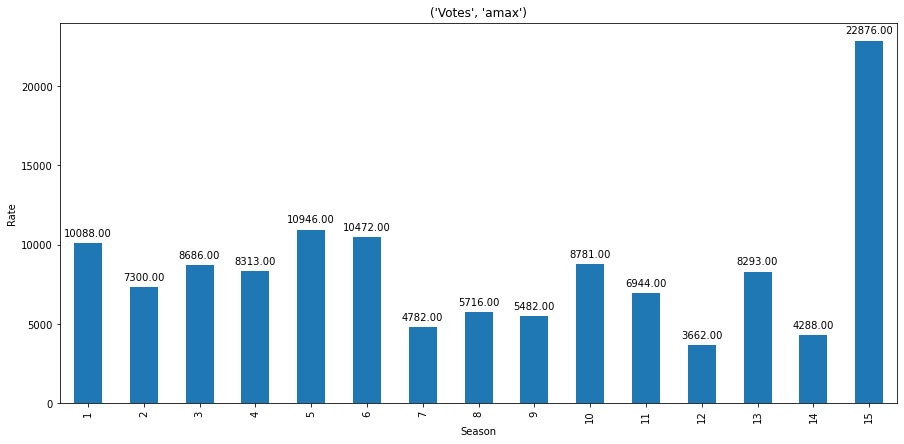

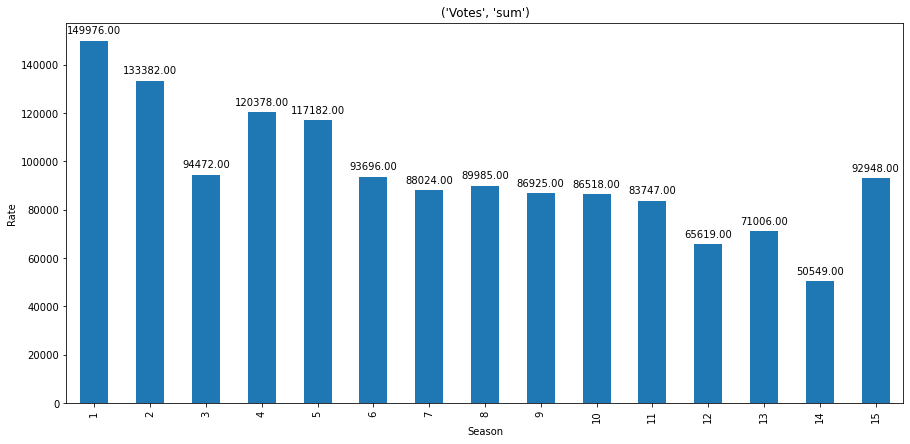

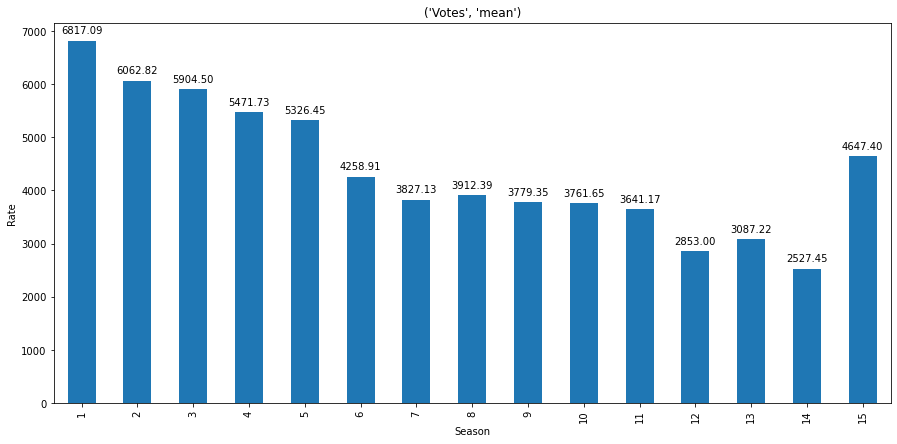

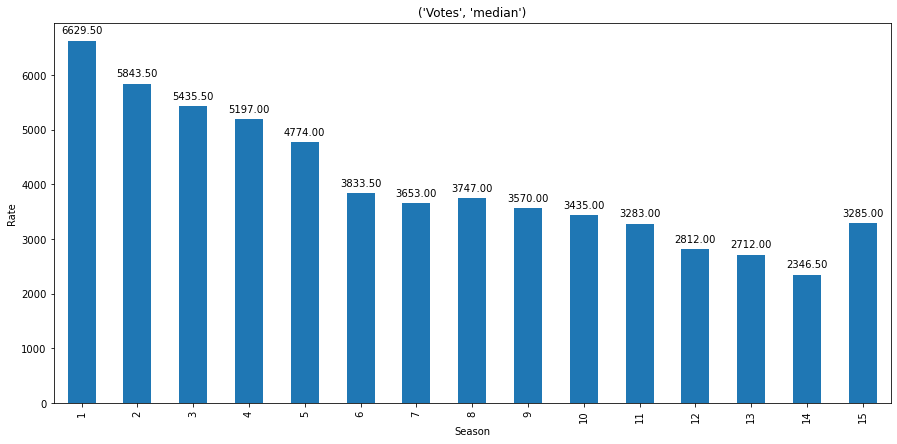

In [18]:
for item in SupernaturalGroupby.columns:
    fig, ax = plt.subplots(figsize=(15, 7))
    SupernaturalGroupby[item].plot(kind='bar')
    ax.set_title(item)
    ax.set_ylabel('Rate')
    ax.set_xlabel('Season')
    add_value_labels(ax)

In [19]:
SeasonFinale = {}
for season in SupernaturalDf.Season.unique():
    SeasonFinale[season] = get_rate(season)

In [20]:
SeasonFinale

{1: 9.2,
 2: 9.4,
 3: 9.2,
 4: 9.3,
 5: 9.7,
 6: 8.9,
 7: 8.7,
 8: 9.3,
 9: 9.3,
 10: 9.1,
 11: 8.5,
 12: 8.9,
 13: 8.6,
 14: 9.3,
 15: 6.9}

([<matplotlib.axis.XTick at 0x217759eb430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

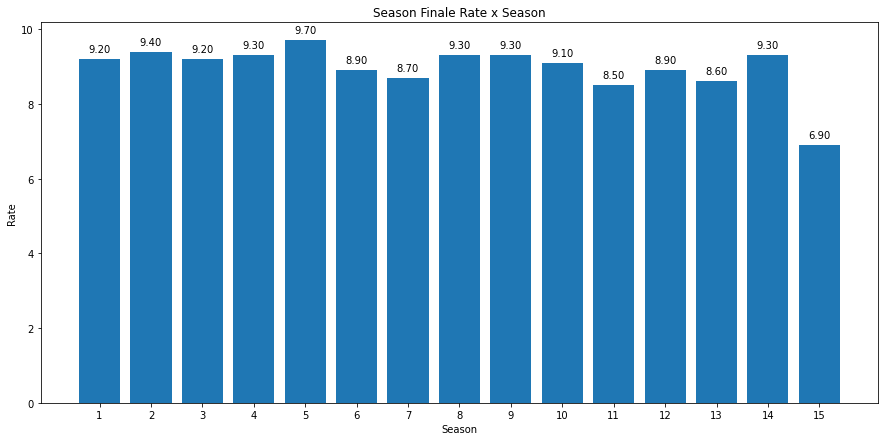

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(SeasonFinale.keys(), SeasonFinale.values())
add_value_labels(ax)
plt.title('Season Finale Rate x Season')
plt.xlabel('Season')
plt.ylabel('Rate')
plt.xticks(list(SeasonFinale.keys()))